In [92]:
import pandas as pd
import numpy as np
import ast
from sklearn import metrics
import matplotlib.pyplot as plt
import time
import cohere

In [182]:
f = open("./data/datasets2/flights100_isClean.txt", "r")
flights_100_pred = f.read()
flights_100_pred = ast.literal_eval(flights_100_pred)
flights_100_pred = [eval(i) for i in flights_100_pred]
flights_100_pred = {'isClean': flights_100_pred}
flights_100_pred = pd.DataFrame(flights_100_pred)
display(flights_100_pred)

,isClean
0,1
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,1
98,1


In [183]:
flights_100_actual = pd.read_csv('./data/datasets2/flight_dirty.csv').loc[:99]
display(flights_100_actual)

,src,flight,scheduled_dept,actual_dept,dept_gate,scheduled_arrival,actual_arrival,arrival_gate,isClean
0,ua,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5,1
1,airtravelcenter,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
2,myrateplan,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
3,helloflight,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
4,flytecomm,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
...,...,...,...,...,...,...,...,...,...
95,flightaware,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10AM PST,2011-12-01 07:32AM PST,47A,2011-12-01 02:52PM EST,2011-12-01 03:12PM EST,B36,0
96,wunderground,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10AM PST,2011-12-01 07:32AM PST,47A,2011-12-01 02:52PM EST,2011-12-01 03:12PM EST,B36,0
97,flights,2011-12-01-AA-222-LAX-BOS,07:10 AM Thu 01-Dec-2011,07:31 AM Thu 01-Dec-2011,47A,03:30 PM Thu 01-Dec-2011,03:14 PM Thu 01-Dec-2011,B36,0
98,businesstravellogue,2011-12-01-AA-222-LAX-BOS,07:10 AM Thu 01-Dec-2011,07:31 AM Thu 01-Dec-2011,47A,03:30 PM Thu 01-Dec-2011,03:14 PM Thu 01-Dec-2011,B36,0


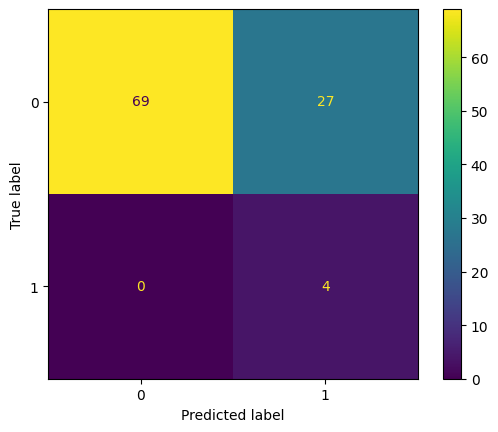

In [184]:
flights100_confusion = metrics.confusion_matrix(flights_100_actual['isClean'],flights_100_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = flights100_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [185]:
print(metrics.classification_report(flights_100_actual['isClean'],flights_100_pred['isClean']))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        96
           1       0.13      1.00      0.23         4

    accuracy                           0.73       100
   macro avg       0.56      0.86      0.53       100
weighted avg       0.97      0.73      0.81       100



In [186]:
f = open("./data/datasets2/hospital100_isClean.txt", "r")
hospital_100_pred = f.read()
hospital_100_pred = ast.literal_eval(hospital_100_pred)
hospital_100_pred = [eval(i) for i in hospital_100_pred]
hospital_100_pred = {'isClean': hospital_100_pred}
hospital_100_pred = pd.DataFrame(hospital_100_pred)
display(hospital_100_pred)

,isClean
0,1
1,0
2,1
3,1
4,0
...,...
95,1
96,1
97,1
98,1


In [187]:
hospital_100_actual = pd.read_csv('./data/datasets2/hospital_100_dirty.csv')
display(hospital_100_actual)

,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,Stateavg,isClean
0,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-6,surgery patients needing hair removed from the...,NaN,NaN,al_scip-inf-6,1
1,1xx19,helen keller memorial hospital,1300 south montgomery avenue,NaN,NaN,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-7a,heart attack patients given fibrinolytic medic...,NaN,0 patients,al_ami-7a,0
2,10019,helen keller memorial hospital,1300 south montgomery avenue,NaN,NaN,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart failure,hf-4,heart failure patients given smoking cessation...,100%,41 patients,al_hf-4,1
3,10001,southeast alabama medical center,1108 ross clark circle,NaN,NaN,dothan,al,36302,houston,3347938701,acute care hospitals,government - hospital district or authority,yes,pneumonia,pn-6,pneumonia patients given the most appropriate ...,80%,147 patients,al_pn-6,1
4,10001,southeast alabama medical center,1108 ross clark circle,NaN,NaN,dothan,al,36302,houston,xx479x8701,acute care hospitals,government - hospital district or authority,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,72%,79 patients,al_scip-card-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10050,st vincents bxount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,heart failure,hf-1,heart failure patients given discharge instruc...,50%,24 patients,al_hf-1,0
96,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,pneumonia,pn-2,pneumonia patients assessed and given pneumoco...,74%,92 patients,al_pn-2,1
97,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,pneumonia,pn-6,pneumonia patients given the most appropriate ...,77%,74 patients,al_pn-6,1
98,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery pxtients who were txking hexrt drugs c...,25%,8 patients,al_scip-card-2,0


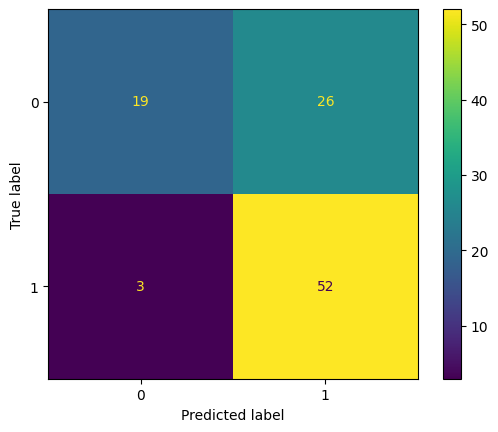

In [188]:
hospital100_confusion = metrics.confusion_matrix(hospital_100_actual['isClean'],hospital_100_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = hospital100_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [189]:
print(metrics.classification_report(hospital_100_actual['isClean'],hospital_100_pred['isClean']))

              precision    recall  f1-score   support

           0       0.86      0.42      0.57        45
           1       0.67      0.95      0.78        55

    accuracy                           0.71       100
   macro avg       0.77      0.68      0.67       100
weighted avg       0.76      0.71      0.69       100



adults

In [190]:
f = open("./data/datasets2/adults_isClean.txt", "r")
adults_pred = f.read()
adults_pred = ast.literal_eval(adults_pred)
adults_pred = [eval(i) for i in adults_pred]
adults_pred = {'isClean': adults_pred}
adults_pred = pd.DataFrame(adults_pred).loc[:99]
display(adults_pred)

,isClean
0,1
1,1
2,0
3,1
4,0
...,...
95,1
96,0
97,1
98,1


In [191]:
adults_actual = pd.read_csv('./data/datasets2/adults_dirty.csv').drop('row_id',axis=1)
adults_actual = adults_actual[:100]
display(adults_actual)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,country,income,isClean
0,31-50,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,MoreThan50K,1
1,>50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,16,United-States,LessThan50K,1
2,>50,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,NaN,MoreThan50K,0
3,22-30,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,LessThan50K,1
4,31-50,Private,Masters,?,Prof-specialty,Husband,White,Male,42,United-States,MoreThan50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,18-21,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,40,United-States,LessThan50K,1
96,22-30,Private,HS-grad,Married-cmv-spoude,Craft-repair,Own-child,Asian-Pac-Islander,Male,40,United-States,LessThan50K,0
97,>50,Local-gov,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,LessThan50K,1
98,31-50,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,90,United-States,MoreThan50K,1


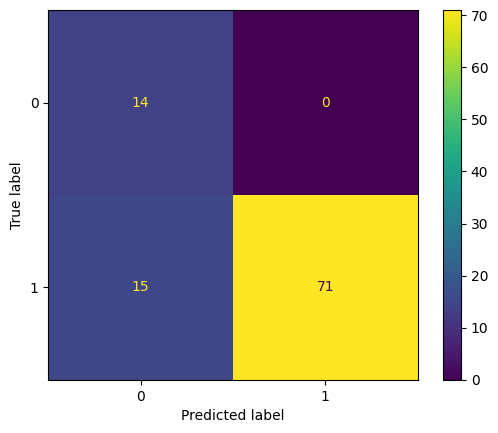

In [192]:
adults_confusion = metrics.confusion_matrix(adults_actual['isClean'],adults_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = adults_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [193]:
print(metrics.classification_report(adults_actual['isClean'],adults_pred['isClean']))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        14
           1       1.00      0.83      0.90        86

    accuracy                           0.85       100
   macro avg       0.74      0.91      0.78       100
weighted avg       0.93      0.85      0.87       100



In [132]:
f = open("./data/datasets2/flights100_isClean_full.txt", "r")
flights_100_pred = f.read()
flights_100_pred = ast.literal_eval(flights_100_pred)
flights100_isCleanFull_pred = pd.DataFrame(columns=['isClean'])
flights_100_actual = pd.read_csv('./data/datasets2/flight_dirty.csv')
flights_100_actual = flights_100_actual.loc[:99]
display(flights_100_actual)

,src,flight,scheduled_dept,actual_dept,dept_gate,scheduled_arrival,actual_arrival,arrival_gate,isClean
0,ua,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5,1
1,airtravelcenter,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
2,myrateplan,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
3,helloflight,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
4,flytecomm,2011-12-01-UA-2708-EWR-CLT,NaN,12/1/11 3:04 PM (-05:00),NaN,NaN,12/1/11 4:22 PM (-05:00),NaN,0
...,...,...,...,...,...,...,...,...,...
95,flightaware,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10AM PST,2011-12-01 07:32AM PST,47A,2011-12-01 02:52PM EST,2011-12-01 03:12PM EST,B36,0
96,wunderground,2011-12-01-AA-222-LAX-BOS,2011-12-01 07:10AM PST,2011-12-01 07:32AM PST,47A,2011-12-01 02:52PM EST,2011-12-01 03:12PM EST,B36,0
97,flights,2011-12-01-AA-222-LAX-BOS,07:10 AM Thu 01-Dec-2011,07:31 AM Thu 01-Dec-2011,47A,03:30 PM Thu 01-Dec-2011,03:14 PM Thu 01-Dec-2011,B36,0
98,businesstravellogue,2011-12-01-AA-222-LAX-BOS,07:10 AM Thu 01-Dec-2011,07:31 AM Thu 01-Dec-2011,47A,03:30 PM Thu 01-Dec-2011,03:14 PM Thu 01-Dec-2011,B36,0


In [133]:
flights_100_clean = pd.read_csv('./data/datasets2/flight_clean.csv')
flights_100_clean = flights_100_clean.loc[:99]
display(flights_100_clean)

,src,flight,scheduled_dept,actual_dept,dept_gate,scheduled_arrival,actual_arrival,arrival_gate
0,ua,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
1,airtravelcenter,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
2,myrateplan,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
3,helloflight,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
4,flytecomm,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
...,...,...,...,...,...,...,...,...
95,flightaware,2011-12-01-AA-222-LAX-BOS,12/01/2011 07:10 AM,12/01/2011 07:31 AM,47A,12/01/2011 03:30 PM,12/01/2011 03:14 PM,B36
96,wunderground,2011-12-01-AA-222-LAX-BOS,12/01/2011 07:10 AM,12/01/2011 07:31 AM,47A,12/01/2011 03:30 PM,12/01/2011 03:14 PM,B36
97,flights,2011-12-01-AA-222-LAX-BOS,12/01/2011 07:10 AM,12/01/2011 07:31 AM,47A,12/01/2011 03:30 PM,12/01/2011 03:14 PM,B36
98,businesstravellogue,2011-12-01-AA-222-LAX-BOS,12/01/2011 07:10 AM,12/01/2011 07:31 AM,47A,12/01/2011 03:30 PM,12/01/2011 03:14 PM,B36


In [134]:
def make_correction_flights(tuple, value):
    message_hist = """You will be passed one row of a csv at a time alongside a cell from the row that is dirty. You will correct the cells and return them. Here are some example rows of a csv called 'flights':
src,flight,scheduled_dept,actual_dept,dept_gate,scheduled_arrival,actual_arrival,arrival_gate
ua,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
airtravelcenter,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
myrateplan,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
helloflight,2011-12-01-UA-2708-EWR-CLT,Thu- Dec 1 2:55 PM,Thu- Dec 1 2:55 PM,A37,Thu- Dec 1 4:53 PM,Thu- Dec 1 4:44 PM,C5
"""
    chat_history = [
        {"role": "USER", "message": message_hist},
        {
            "role": "CHATBOT",
            "message": "Okay, I understand.",
        },
    ]

    message = "Please correct the error in the cell '" + value + "' from the tuple \n'" + tuple + "' and return ONLY the cleaned value."

    response = co.chat(
        chat_history=chat_history,
        # temperature=0.7,
        message=message,
        connectors=[],
    )

    answer = response.text
    print(message)
    print(answer)

    user_message = {"user_name": "User", "text": message}
    cohere_response = {"user_name": "Chatbot", "text": answer}

    chat_history.append(user_message)
    chat_history.append(cohere_response)
    return answer

In [135]:
correct_correction = []
for ind1, tup_pred in enumerate(flights_100_pred):
    if len(tup_pred) != len(flights_100_actual.columns)-1:
        for _ in range(len(flights_100_actual.columns)-1):
            flights100_isCleanFull_pred.loc[len(flights100_isCleanFull_pred.index)] = [-1]
            print(1)
    else:
        for ind, char in enumerate(tup_pred):
            flights100_isCleanFull_pred.loc[len(flights100_isCleanFull_pred.index)] = [int(char)]
            if int(char) == 0:
                # print(str(flights_100_clean[flights_100_clean.columns[ind]][ind]))
                # print(str(flights_100_actual[flights_100_actual.columns[ind]][ind]))
                # print()
                # if str(flights_100_clean[flights_100_clean.columns[ind]][ind1]) != str(flights_100_actual[flights_100_actual.columns[ind]][ind1]):
                    # make correction
                correction = make_correction_flights(str(flights_100_actual.drop('isClean',axis=1).iloc[ind1]), str(flights_100_actual[flights_100_actual.columns[ind]][ind1]))
                # add 1 if correction is right
                time.sleep(10)

                correct_correction.append(1 if correction == str(flights_100_clean[flights_100_clean.columns[ind]][ind1]) else 0)
                # else:
                #     correct_correction.append(0)

display(flights100_isCleanFull_pred)

# for tup_pred in flights_100_pred:
#     if len(tup_pred) != len(flights_100_actual.columns)-1:
#         for _ in range(len(flights_100_actual.columns)-1):
#             flights100_isCleanFull_pred.loc[len(flights100_isCleanFull_pred.index)] = [-1]
#     else:
#         for char in tup_pred:
#             flights100_isCleanFull_pred.loc[len(flights100_isCleanFull_pred.index)] = [int(char)]
# display(flights100_isCleanFull_pred)

Please correct the error in the cell 'flightstats' from the tuple 
'src                                 flightstats
flight               2011-12-01-UA-2708-EWR-CLT
scheduled_dept               2011-12-01 2:55 PM
actual_dept                  2011-12-01 2:52 PM
dept_gate                                   NaN
scheduled_arrival            2011-12-01 4:53 PM
actual_arrival               2011-12-01 4:44 PM
arrival_gate                                NaN
Name: 8, dtype: object' and return ONLY the cleaned value.
2011-12-01-UA-2708-EWR-CLT
Please correct the error in the cell 'nan' from the tuple 
'src                                 flightstats
flight               2011-12-01-UA-2708-EWR-CLT
scheduled_dept               2011-12-01 2:55 PM
actual_dept                  2011-12-01 2:52 PM
dept_gate                                   NaN
scheduled_arrival            2011-12-01 4:53 PM
actual_arrival               2011-12-01 4:44 PM
arrival_gate                                NaN
Name: 8, dtype: ob

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
795,1
796,1
797,1
798,1


In [139]:
print(correct_correction)
print(sum(correct_correction))
print(len(correct_correction))

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
23
238


In [79]:
flights100_isCleanFull_actual = pd.DataFrame(columns=['isClean'])
for ind in flights_100_clean.index:
    for column in flights_100_clean.columns:
        if str(flights_100_clean[column][ind]) == str(flights_100_actual[column][ind]):
            flights100_isCleanFull_actual.loc[len(flights100_isCleanFull_actual.index)] = [1]
        else:
            flights100_isCleanFull_actual.loc[len(flights100_isCleanFull_actual.index)] = [0]
    
display(flights100_isCleanFull_actual)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
795,0
796,1
797,0
798,0


In [80]:
for ind in range(len(flights100_isCleanFull_pred.index)):
    if flights100_isCleanFull_pred['isClean'][ind] == -1:
        flights100_isCleanFull_pred['isClean'][ind] = 0 if flights100_isCleanFull_actual['isClean'][ind] == 1 else 0

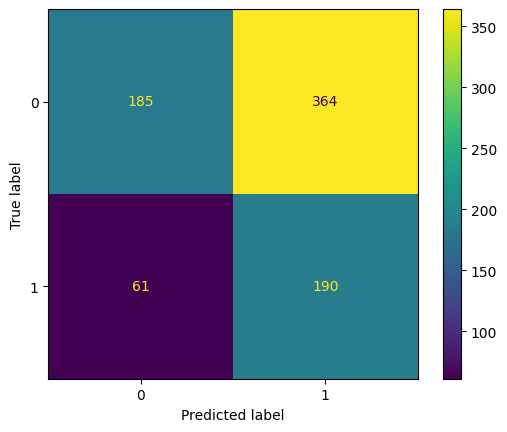

In [81]:
flights_full_confusion = metrics.confusion_matrix(flights100_isCleanFull_actual['isClean'],flights100_isCleanFull_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = flights_full_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [82]:
print(metrics.classification_report(flights100_isCleanFull_actual['isClean'],flights100_isCleanFull_pred['isClean']))

              precision    recall  f1-score   support

           0       0.75      0.34      0.47       549
           1       0.34      0.76      0.47       251

    accuracy                           0.47       800
   macro avg       0.55      0.55      0.47       800
weighted avg       0.62      0.47      0.47       800



In [176]:
f = open("./data/datasets2/adults100_isClean_full.txt", "r")
adults_100_pred = f.read()
adults_100_pred = ast.literal_eval(adults_100_pred)
adults_100_isCleanFull_pred = pd.DataFrame(columns=['isClean'])
adults_100_actual = pd.read_csv('./data/datasets2/adults_dirty.csv').drop('row_id',axis=1)
adults_100_actual = adults_100_actual.loc[:99]
display(adults_100_actual)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,country,income,isClean
0,31-50,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,MoreThan50K,1
1,>50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,16,United-States,LessThan50K,1
2,>50,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,NaN,MoreThan50K,0
3,22-30,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,LessThan50K,1
4,31-50,Private,Masters,?,Prof-specialty,Husband,White,Male,42,United-States,MoreThan50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,18-21,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,40,United-States,LessThan50K,1
96,22-30,Private,HS-grad,Married-cmv-spoude,Craft-repair,Own-child,Asian-Pac-Islander,Male,40,United-States,LessThan50K,0
97,>50,Local-gov,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,LessThan50K,1
98,31-50,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,90,United-States,MoreThan50K,1


In [177]:
adults_100_clean = pd.read_csv('./data/datasets2/adults_clean.csv').drop('row_id',axis=1)
adults_100_clean = adults_100_clean.loc[:99]
display(adults_100_clean)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,country,income
0,31-50,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,MoreThan50K
1,>50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,16,United-States,LessThan50K
2,>50,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,United-States,MoreThan50K
3,22-30,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,LessThan50K
4,31-50,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,42,United-States,MoreThan50K
...,...,...,...,...,...,...,...,...,...,...,...
95,18-21,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,40,United-States,LessThan50K
96,22-30,Private,HS-grad,Married-civ-spouse,Craft-repair,Own-child,Asian-Pac-Islander,Male,40,United-States,LessThan50K
97,>50,Local-gov,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,LessThan50K
98,31-50,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,90,United-States,MoreThan50K


In [146]:
correct_correction = []
for ind1, tup_pred in enumerate(adults_100_pred):
    if len(tup_pred) != len(adults_100_actual.columns)-1:
        for _ in range(len(adults_100_actual.columns)-1):
            adults_100_isCleanFull_pred.loc[len(adults_100_isCleanFull_pred.index)] = [-1]
            print(1)
    else:
        for ind, char in enumerate(tup_pred):
            adults_100_isCleanFull_pred.loc[len(adults_100_isCleanFull_pred.index)] = [int(char)]
            # if int(char) == 0:
            #     # print(str(adults_100_clean[adults_100_clean.columns[ind]][ind]))
            #     # print(str(adults_100_actual[adults_100_actual.columns[ind]][ind]))
            #     # print()
            #     # if str(adults_100_clean[adults_100_clean.columns[ind]][ind1]) != str(adults_100_actual[adults_100_actual.columns[ind]][ind1]):
            #         # make correction
            #     correction = make_correction_adults(str(adults_100_actual.drop('isClean',axis=1).iloc[ind1]), str(adults_100_actual[adults_100_actual.columns[ind]][ind1]))
            #     # add 1 if correction is right
            #     time.sleep(10)

            #     correct_correction.append(1 if correction == str(adults_100_clean[adults_100_clean.columns[ind]][ind1]) else 0)
            #     # else:
            #     #     correct_correction.append(0)

display(adults_100_isCleanFull_pred)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
1095,1
1096,1
1097,1
1098,1


In [147]:
adults_100_isCleanFull_actual = pd.DataFrame(columns=['isClean'])
for ind in adults_100_clean.index:
    for column in adults_100_clean.columns:
        if str(adults_100_clean[column][ind]) == str(adults_100_actual[column][ind]):
            adults_100_isCleanFull_actual.loc[len(adults_100_isCleanFull_actual.index)] = [1]
        else:
            adults_100_isCleanFull_actual.loc[len(adults_100_isCleanFull_actual.index)] = [0]
    
display(adults_100_isCleanFull_actual)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
1095,1
1096,1
1097,1
1098,1


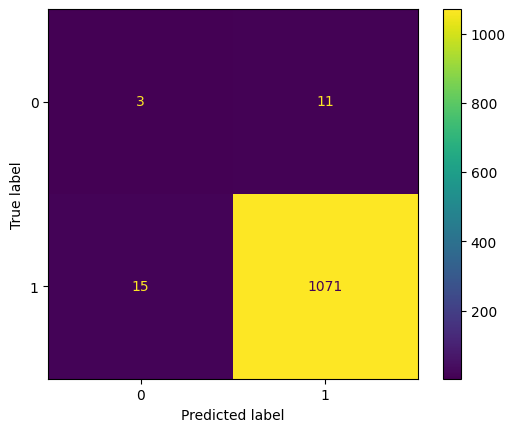

In [148]:
adults_100_full_confusion = metrics.confusion_matrix(adults_100_isCleanFull_actual['isClean'],adults_100_isCleanFull_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = adults_100_full_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [93]:
API_KEY_TRIAL = 'ScXs9ysXpd8abMMfZ2nMAkdASGV4urx4XkblQE3M'
co = cohere.Client(API_KEY_TRIAL)

In [124]:
def make_correction_adult(tuple, value):
    message_hist = """You will be passed one row of a csv at a time alongside a cell from the row that is dirty. You will correct the cells and return them. Here are some example rows of a csv called 'adults':
age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,country,income
31-50,Private,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Female,40,United-States,MoreThan50K
>50,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,16,United-States,LessThan50K
>50,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,United-States,MoreThan50K
22-30,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,LessThan50K
31-50,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,42,United-States,MoreThan50K
>50,Private,10th,Divorced,Other-service,Not-in-family,Black,Male,64,United-States,LessThan50K
"""
    chat_history = [
        {"role": "USER", "message": message_hist},
        {
            "role": "CHATBOT",
            "message": "Okay, I understand.",
        },
    ]

    message = "Please correct the error in the cell '" + value + "' from the tuple \n'" + tuple + "' and return ONLY the cleaned value."

    response = co.chat(
        chat_history=chat_history,
        # temperature=0.7,
        message=message,
        connectors=[],
    )

    answer = response.text
    print(message)
    print(answer)

    user_message = {"user_name": "User", "text": message}
    cohere_response = {"user_name": "Chatbot", "text": answer}

    chat_history.append(user_message)
    chat_history.append(cohere_response)
    return answer

In [125]:
correct_correction = []
for ind1, tup_pred in enumerate(adults_100_pred):
    if len(tup_pred) != len(adults_100_actual.columns)-1:
        for _ in range(len(adults_100_actual.columns)-1):
            adults100_isCleanFull_pred.loc[len(adults100_isCleanFull_pred.index)] = [-1]
            print(1)
    else:
        for ind, char in enumerate(tup_pred):
            adults100_isCleanFull_pred.loc[len(adults100_isCleanFull_pred.index)] = [int(char)]
            if int(char) == 0:
                # print(str(adults_100_clean[adults_100_clean.columns[ind]][ind]))
                # print(str(adults_100_actual[adults_100_actual.columns[ind]][ind]))
                # print()
                # if str(adults_100_clean[adults_100_clean.columns[ind]][ind1]) != str(adults_100_actual[adults_100_actual.columns[ind]][ind1]):
                    # make correction
                correction = make_correction_adult(str(adults_100_actual.drop('isClean',axis=1).iloc[ind1]), str(adults_100_actual[adults_100_actual.columns[ind]][ind1]))
                # add 1 if correction is right
                time.sleep(10)

                correct_correction.append(1 if correction == str(adults_100_clean[adults_100_clean.columns[ind]][ind1]) else 0)
                # else:
                #     correct_correction.append(0)

display(adults100_isCleanFull_pred)

Please correct the error in the cell 'Male' from the tuple 
'age                             >50
workclass                   Private
education              Some-college
maritalstatus    Married-civ-spouse
occupation          Exec-managerial
relationship                Husband
race                          White
sex                            Male
hoursperweek                     55
country                         NaN
income                  MoreThan50K
Name: 2, dtype: object' and return ONLY the cleaned value.
Female
Please correct the error in the cell '?' from the tuple 
'age                       31-50
workclass               Private
education               Masters
maritalstatus                 ?
occupation       Prof-specialty
relationship            Husband
race                      White
sex                        Male
hoursperweek                 42
country           United-States
income              MoreThan50K
Name: 4, dtype: object' and return ONLY the cleaned value.
Married-

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
1095,1
1096,1
1097,1
1098,1


In [126]:
# 1/3 for adults only looking at true negative
print(correct_correction)

[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [127]:
def make_correction_hospital(tuple, value):
    message_hist = """You will be passed one row of a csv at a time alongside a cell from the row that is dirty. You will correct the cells and return them. Here are some example rows of a csv called 'hospital':
ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,Stateavg
10018,callahan eye foundation hospital,1720 university blvd,,,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs called beta blockers before coming to the hospital who were kept on the beta blockers during the period just before and after their surgery,,,al_scip-card-2
10024,jackson hospital & clinic inc,1725 pine street,,,montgomery,al,36106,montgomery,3342938000,acute care hospitals,voluntary non-profit - private,yes,heart attack,ami-1,heart attack patients given aspirin at arrival,95%,111 patients,al_ami-1
10023,baptist medical center south,2105 east south boulevard,,,montgomery,al,36116,montgomery,3342882100,acute care hospitals,voluntary non-profit - church,yes,surgical infection prevention,scip-vte-2,patients who got treatment  at the right time (within 24 hours before or after their surgery) to help prevent blood clots after certain types of surgery,94%,179 patients,al_scip-vte-2
10027,elba general hospital,987 drayton street,,,elba,al,36323,coffee,3348972257,acute care hospitals,voluntary non-profit - other,yes,pneumonia,pn-3b,pneumonia patients whose initial emergency room blood culture was performed prior to the administration of the first hospital dose of antibiotics,100%,19 patients,al_pn-3b
"""
    chat_history = [
        {"role": "USER", "message": message_hist},
        {
            "role": "CHATBOT",
            "message": "Okay, I understand.",
        },
    ]

    message = "Please correct the error in the cell '" + value + "' from the tuple \n'" + tuple + "' and return ONLY the cleaned value."

    response = co.chat(
        chat_history=chat_history,
        # temperature=0.7,
        message=message,
        connectors=[],
    )

    answer = response.text
    print(message)
    print(answer)

    user_message = {"user_name": "User", "text": message}
    cohere_response = {"user_name": "Chatbot", "text": answer}

    chat_history.append(user_message)
    chat_history.append(cohere_response)
    return answer

In [128]:
f = open("./data/datasets2/hospital100_isClean_full.txt", "r")
hospital_100_pred = f.read()
hospital_100_pred = ast.literal_eval(hospital_100_pred)
hospital100_isCleanFull_pred = pd.DataFrame(columns=['isClean'])
hospital_100_actual = pd.read_csv('./data/datasets2/hospital_100_dirty.csv')
display(hospital_100_actual)

,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,Stateavg,isClean
0,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-6,surgery patients needing hair removed from the...,NaN,NaN,al_scip-inf-6,1
1,1xx19,helen keller memorial hospital,1300 south montgomery avenue,NaN,NaN,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-7a,heart attack patients given fibrinolytic medic...,NaN,0 patients,al_ami-7a,0
2,10019,helen keller memorial hospital,1300 south montgomery avenue,NaN,NaN,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart failure,hf-4,heart failure patients given smoking cessation...,100%,41 patients,al_hf-4,1
3,10001,southeast alabama medical center,1108 ross clark circle,NaN,NaN,dothan,al,36302,houston,3347938701,acute care hospitals,government - hospital district or authority,yes,pneumonia,pn-6,pneumonia patients given the most appropriate ...,80%,147 patients,al_pn-6,1
4,10001,southeast alabama medical center,1108 ross clark circle,NaN,NaN,dothan,al,36302,houston,xx479x8701,acute care hospitals,government - hospital district or authority,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,72%,79 patients,al_scip-card-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10050,st vincents bxount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,heart failure,hf-1,heart failure patients given discharge instruc...,50%,24 patients,al_hf-1,0
96,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,pneumonia,pn-2,pneumonia patients assessed and given pneumoco...,74%,92 patients,al_pn-2,1
97,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,pneumonia,pn-6,pneumonia patients given the most appropriate ...,77%,74 patients,al_pn-6,1
98,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery pxtients who were txking hexrt drugs c...,25%,8 patients,al_scip-card-2,0


In [129]:
hospital_100_clean = pd.read_csv('./data/datasets2/hospital_100_clean.csv')
display(hospital_100_clean)

,ProviderNumber,HospitalName,Address1,Address2,Address3,City,State,ZipCode,CountyName,PhoneNumber,HospitalType,HospitalOwner,EmergencyService,Condition,MeasureCode,MeasureName,Score,Sample,Stateavg
0,10018,callahan eye foundation hospital,1720 university blvd,NaN,NaN,birmingham,al,35233,jefferson,2053258100,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-inf-6,surgery patients needing hair removed from the...,NaN,NaN,al_scip-inf-6
1,10019,helen keller memorial hospital,1300 south montgomery avenue,NaN,NaN,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart attack,ami-7a,heart attack patients given fibrinolytic medic...,NaN,0 patients,al_ami-7a
2,10019,helen keller memorial hospital,1300 south montgomery avenue,NaN,NaN,sheffield,al,35660,jefferson,2563864556,acute care hospitals,government - hospital district or authority,yes,heart failure,hf-4,heart failure patients given smoking cessation...,100%,41 patients,al_hf-4
3,10001,southeast alabama medical center,1108 ross clark circle,NaN,NaN,dothan,al,36302,houston,3347938701,acute care hospitals,government - hospital district or authority,yes,pneumonia,pn-6,pneumonia patients given the most appropriate ...,80%,147 patients,al_pn-6
4,10001,southeast alabama medical center,1108 ross clark circle,NaN,NaN,dothan,al,36302,houston,3347938701,acute care hospitals,government - hospital district or authority,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,72%,79 patients,al_scip-card-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,heart failure,hf-1,heart failure patients given discharge instruc...,50%,24 patients,al_hf-1
96,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,pneumonia,pn-2,pneumonia patients assessed and given pneumoco...,74%,92 patients,al_pn-2
97,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,pneumonia,pn-6,pneumonia patients given the most appropriate ...,77%,74 patients,al_pn-6
98,10050,st vincents blount,150 gilbreath drive,NaN,NaN,oneonta,al,35121,blount,2052743000,acute care hospitals,voluntary non-profit - private,yes,surgical infection prevention,scip-card-2,surgery patients who were taking heart drugs c...,25%,8 patients,al_scip-card-2


In [130]:
correct_correction = []
for ind1, tup_pred in enumerate(hospital_100_pred):
    if len(tup_pred) != len(hospital_100_actual.columns)-1:
        for _ in range(len(hospital_100_actual.columns)-1):
            hospital100_isCleanFull_pred.loc[len(hospital100_isCleanFull_pred.index)] = [-1]
            print(1)
    else:
        for ind, char in enumerate(tup_pred):
            hospital100_isCleanFull_pred.loc[len(hospital100_isCleanFull_pred.index)] = [int(char)]
            if int(char) == 0:
                # print(str(hospital_100_clean[hospital_100_clean.columns[ind]][ind]))
                # print(str(hospital_100_actual[hospital_100_actual.columns[ind]][ind]))
                # print()
                # if str(hospital_100_clean[hospital_100_clean.columns[ind]][ind1]) != str(hospital_100_actual[hospital_100_actual.columns[ind]][ind1]):
                    # make correction
                correction = make_correction_adult(str(hospital_100_actual.drop('isClean',axis=1).iloc[ind1]), str(hospital_100_actual[hospital_100_actual.columns[ind]][ind1]))
                # add 1 if correction is right
                time.sleep(10)

                correct_correction.append(1 if correction == str(hospital_100_clean[hospital_100_clean.columns[ind]][ind1]) else 0)
                # else:
                #     correct_correction.append(0)

display(hospital100_isCleanFull_pred)
# for tup_pred in hospital_100_pred:
#     if len(tup_pred) != len(hospital_100_actual.columns)-1:
#         for _ in range(len(hospital_100_actual.columns)-1):
#             hospital100_isCleanFull_pred.loc[len(hospital100_isCleanFull_pred.index)] = [-1]
#     else:
#         for char in tup_pred:
#             hospital100_isCleanFull_pred.loc[len(hospital100_isCleanFull_pred.index)] = [int(char)]
# display(hospital100_isCleanFull_pred)

Please correct the error in the cell '1720 university blvd' from the tuple 
'ProviderNumber                                                  10018
HospitalName                         callahan eye foundation hospital
Address1                                         1720 university blvd
Address2                                                          NaN
Address3                                                          NaN
City                                                       birmingham
State                                                              al
ZipCode                                                         35233
CountyName                                                  jefferson
PhoneNumber                                                2053258100
HospitalType                                     acute care hospitals
HospitalOwner                          voluntary non-profit - private
EmergencyService                                                  yes
Condition    

,isClean
0,1
1,1
2,0
3,1
4,1
...,...
1895,1
1896,1
1897,1
1898,1


In [131]:
print(correct_correction)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [162]:
for ind in range(len(adults_100_isCleanFull_pred.index)):
    if adults_100_isCleanFull_pred['isClean'][ind] == -1:
        adults_100_isCleanFull_pred['isClean'][ind] = 0 if adults_100_isCleanFull_actual['isClean'][ind] == 1 else 0

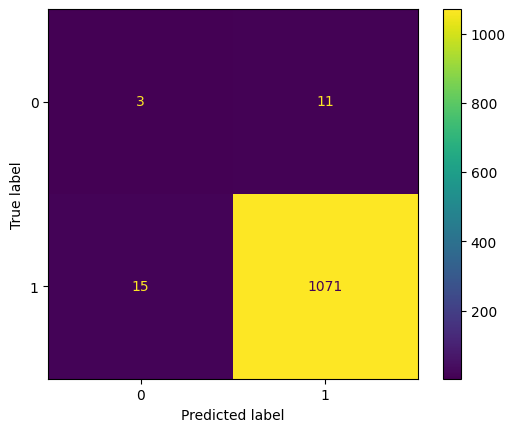

In [72]:
adults_full_confusion = metrics.confusion_matrix(adults100_isCleanFull_actual['isClean'],adults100_isCleanFull_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = adults_full_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [73]:
print(metrics.classification_report(adults100_isCleanFull_actual['isClean'],adults100_isCleanFull_pred['isClean']))

              precision    recall  f1-score   support

           0       0.17      0.21      0.19        14
           1       0.99      0.99      0.99      1086

    accuracy                           0.98      1100
   macro avg       0.58      0.60      0.59      1100
weighted avg       0.98      0.98      0.98      1100



hospital

In [50]:
hospital100_isCleanFull_actual = pd.DataFrame(columns=['isClean'])
for ind in hospital_100_clean.index:
    for column in hospital_100_clean.columns:
        if str(hospital_100_clean[column][ind]) == str(hospital_100_actual[column][ind]):
            hospital100_isCleanFull_actual.loc[len(hospital100_isCleanFull_actual.index)] = [1]
        else:
            hospital100_isCleanFull_actual.loc[len(hospital100_isCleanFull_actual.index)] = [0]
    
display(hospital100_isCleanFull_actual)

,isClean
0,1
1,1
2,1
3,1
4,1
...,...
1895,1
1896,1
1897,1
1898,1


In [58]:
for ind in range(len(hospital100_isCleanFull_pred.index)):
    if hospital100_isCleanFull_pred['isClean'][ind] == -1:
        hospital100_isCleanFull_pred['isClean'][ind] = 0 if hospital100_isCleanFull_actual['isClean'][ind] == 1 else 0

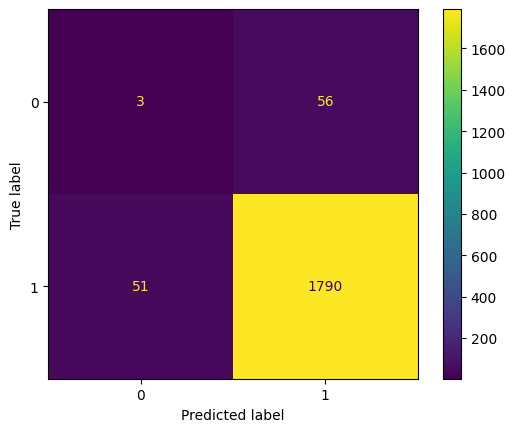

In [61]:
hospital_full_confusion = metrics.confusion_matrix(hospital100_isCleanFull_actual['isClean'],hospital100_isCleanFull_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = hospital_full_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [59]:
print(metrics.classification_report(hospital100_isCleanFull_actual['isClean'],hospital100_isCleanFull_pred['isClean']))

              precision    recall  f1-score   support

           0       0.06      0.05      0.05        59
           1       0.97      0.97      0.97      1841

    accuracy                           0.94      1900
   macro avg       0.51      0.51      0.51      1900
weighted avg       0.94      0.94      0.94      1900



In [171]:
total_full_pred = pd.DataFrame()
total_full_pred = total_full_pred.append(hospital100_isCleanFull_pred).append(adults_100_isCleanFull_pred).append(flights100_isCleanFull_pred)
total_full_pred = total_full_pred.reset_index().drop('index',axis=1)
total_full_actual = pd.DataFrame()
total_full_actual = total_full_actual.append(hospital100_isCleanFull_actual).append(adults_100_isCleanFull_actual).append(flights100_isCleanFull_actual)
total_full_actual = total_full_actual.reset_index().drop('index',axis=1)

C:\Users\reece\AppData\Local\Temp\ipykernel_15524\302144808.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_full_pred = total_full_pred.append(hospital100_isCleanFull_pred).append(adults_100_isCleanFull_pred).append(flights100_isCleanFull_pred)
C:\Users\reece\AppData\Local\Temp\ipykernel_15524\302144808.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_full_pred = total_full_pred.append(hospital100_isCleanFull_pred).append(adults_100_isCleanFull_pred).append(flights100_isCleanFull_pred)
C:\Users\reece\AppData\Local\Temp\ipykernel_15524\302144808.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_full_pred = total_full_pred.append(hospital100_isCleanFull_pred).append(adults_100_isCleanFull_pred).appe

In [172]:
for ind in range(len(total_full_pred.index)):
    if total_full_pred['isClean'][ind] == -1:
        total_full_pred['isClean'][ind] = 0 if total_full_actual['isClean'][ind] == 1 else 0

In [173]:
print(total_full_pred.isClean.unique())

[1 0]


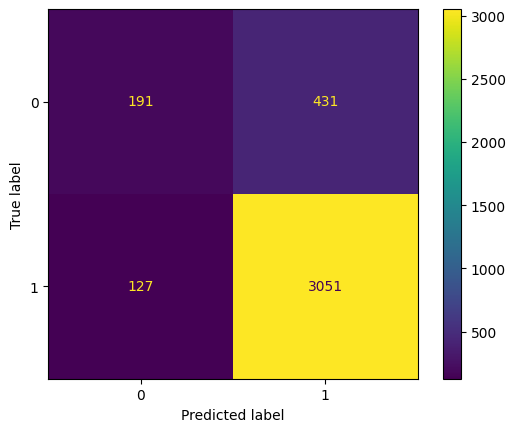

In [174]:
total_full_confusion = metrics.confusion_matrix(total_full_actual['isClean'],total_full_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = total_full_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [175]:
print(metrics.classification_report(total_full_actual['isClean'],total_full_pred['isClean']))

              precision    recall  f1-score   support

           0       0.60      0.31      0.41       622
           1       0.88      0.96      0.92      3178

    accuracy                           0.85      3800
   macro avg       0.74      0.63      0.66      3800
weighted avg       0.83      0.85      0.83      3800



In [196]:
total_pred = pd.DataFrame()
total_pred = total_pred.append(hospital_100_pred).append(adults_pred).append(flights_100_pred)
total_pred = total_pred.reset_index().drop('index',axis=1)
total_actual = pd.DataFrame()
total_actual = total_actual.append(hospital_100_actual).append(adults_actual).append(flights_100_actual)
total_actual = total_actual.reset_index().drop('index',axis=1)

C:\Users\reece\AppData\Local\Temp\ipykernel_15524\1085121874.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_pred = total_pred.append(hospital_100_pred).append(adults_pred).append(flights_100_pred)
C:\Users\reece\AppData\Local\Temp\ipykernel_15524\1085121874.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_actual = total_actual.append(hospital_100_actual).append(adults_actual).append(flights_100_actual)


In [197]:
for ind in range(len(total_pred.index)):
    if total_pred['isClean'][ind] == -1:
        total_pred['isClean'][ind] = 0 if total_actual['isClean'][ind] == 1 else 0

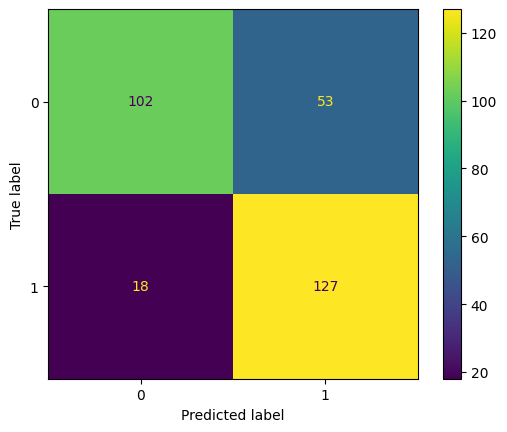

In [198]:
total_confusion = metrics.confusion_matrix(total_actual['isClean'],total_pred['isClean'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = total_confusion, display_labels = [0, 1]) 
cm_display.plot()
plt.show()

In [199]:
print(metrics.classification_report(total_actual['isClean'],total_pred['isClean']))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74       155
           1       0.71      0.88      0.78       145

    accuracy                           0.76       300
   macro avg       0.78      0.77      0.76       300
weighted avg       0.78      0.76      0.76       300

